# Data Cleaning and Exploratory Data Analysis with Pandas

For this project, I have looked at data from YouTube containing information about the published date, trending date, category, views, likes, dislikes and comment counts for trending videos in 10 countries. 

As a first step of the data analysis process, I have looked at the data and converted data types such that they are easily manipulated during analysis. After that I examined for any missing, N/A values. Once, that was done, I combined the different data frames from all the countries into one combined data frame. I then inserted a category column into the data frame by reading the categories from a JSON file. This concluded the **data cleaning** portion of the data analysis.

Once the data was cleaned, I performed **exploratory data analysis (EDA)** and answered questions like:
1. What was the ratio of likes and dislikes in different categories?
2. What was the category of the trending videos in each country?
3. What were the top 5 videos trending in each country?
4. Is the most liked video also the most trending video?
5. What was the number of days between publishing a video and when it became trending?
6. What were the most liked categories?
7. Which categories got the most comments?
8. What were the most frequently words occurring in tags and descriptions?
9. Were there any correlations between views, likes, dislikes and comments?

### Data Cleaning

In [1]:
# importing the necessary libraries.
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# Since there were different csv files for each country.
# Importing all the csv files.
import glob
all_csv = [i for i in glob.glob('*.{}'.format('csv'))]
all_csv

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [3]:
# Reading all the csv files and putting them into individual dataframes.
all_dataframes = []
for csv in all_csv:
    df = pd.read_csv(csv, encoding='ISO-8859-1')
    df['country'] = csv[0:2]
    all_dataframes.append(df)
    

In [4]:
# Looking at the data frame for one country: US.
all_dataframes[8].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [5]:
# Getting info on the data types of the columns.
all_dataframes[8].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

**Fixing the data type of the columns to make them easier to manipulate.**

1. Converting video_id, title, channel_title, category_id, tags, thumbnail_link and description as str.
2. Converting comments_disabled, ratings_disabled, video_error_or_removed into category.
3. Converting trending date into date time.
4. Splitting publish_date into publish_date(datetime) and publish_time(str).

In [6]:
for df in all_dataframes:
    # video_id 
    df['video_id'] = df['video_id'].astype('str') 
    
    # trending date
    df['trending_date'] = df['trending_date'].astype('str') 
    date_pieces = (df['trending_date']
                   .str.split('.')
                  )
    df['Year'] = date_pieces.str[0].astype(int)
    df['Day'] = date_pieces.str[1].astype(int)
    df['Month'] = date_pieces.str[2].astype(int)
    updatedyear = []
    for i in range(len(df)) : 
        y = df.loc[i, "Year"]
        newy = y+2000
        updatedyear.append(newy)
    for i in range(len(df)):
        newy = updatedyear[i]
        tr = df.loc[i, "Year"]
        df['Year'].replace(to_replace = tr, value = newy, inplace=True)
    del df['trending_date']
    df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
    del df['Year']
    del df['Day']
    del df['Month']
    
    #title
    df['title'] = df['title'].astype('str')
    #channel_title
    df['channel_title'] = df['channel_title'].astype('str')
    #category_id
    df['category_id'] = df['category_id'].astype(str) 
    
    #tags
    df['tags'] = df['tags'].astype('str')
    
    #thumbnail_link
    df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
    
    #description
    df['description'] = df['description'].astype('str')
    
    # Changing comments_disabled, ratings_disabled, video_error_or_removed from bool to categorical
    df['comments_disabled'] = df['comments_disabled'].astype('category') 
    df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
    df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 
    
    # publish_time 
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [7]:
# Separating publish time into publish date and publish time.
for df in all_dataframes:
    df.insert(4, 'publish_date', df['publish_time'].dt.date)
    df['publish_time'] = df['publish_time'].dt.time
    
# Changing data type for 'publish_date' from object to 'datetime64[ns]'
for df in all_dataframes:
     df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [8]:
# Now checking that the changes to data types has taken place.
all_dataframes[1].dtypes

video_id                          object
title                             object
channel_title                     object
category_id                       object
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [9]:
# Looking at the data.
all_dataframes[8].head()

,video_id,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2017-11-14
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2017-11-14
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US,2017-11-14
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,2017-11-14
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,2017-11-14


In [10]:
# Setting the index of the data frame as video_id which is unique.
for df in all_dataframes:
    df.set_index('video_id', inplace=True)

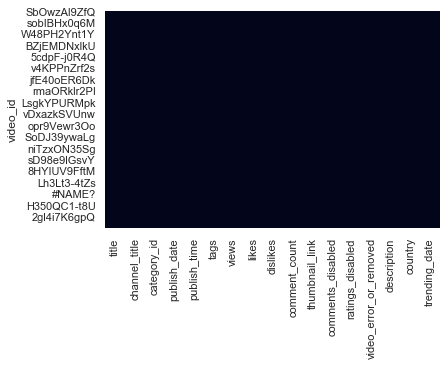

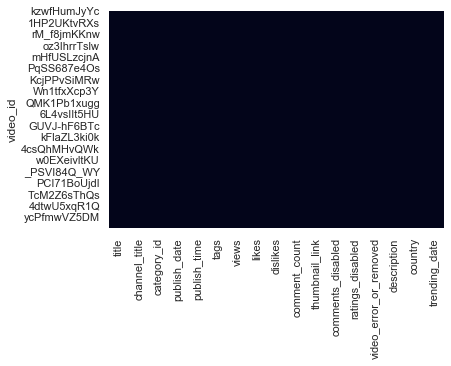

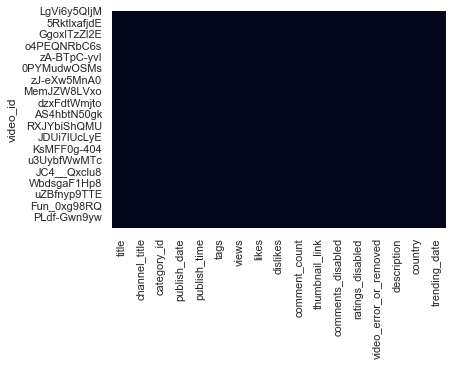

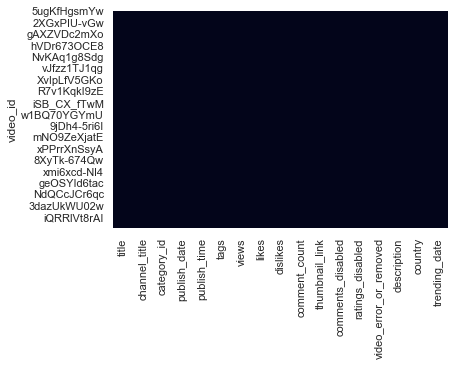

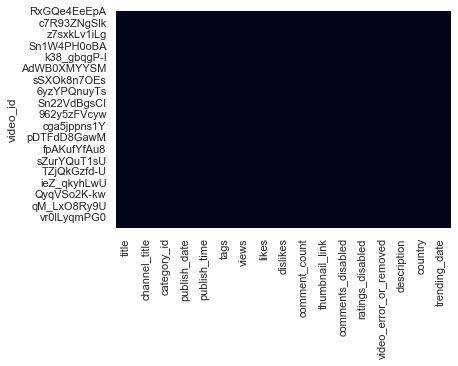

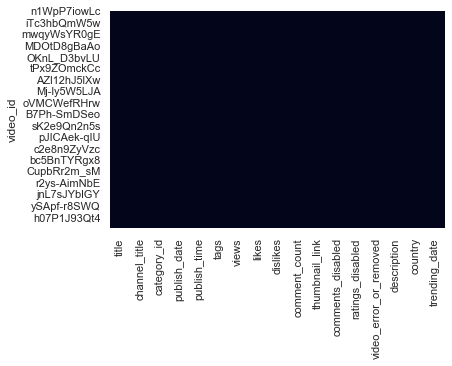

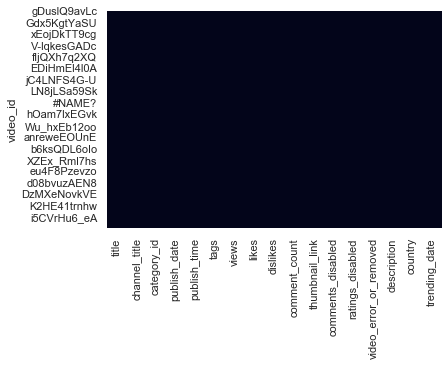

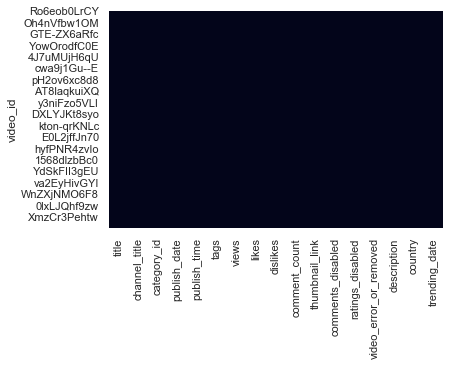

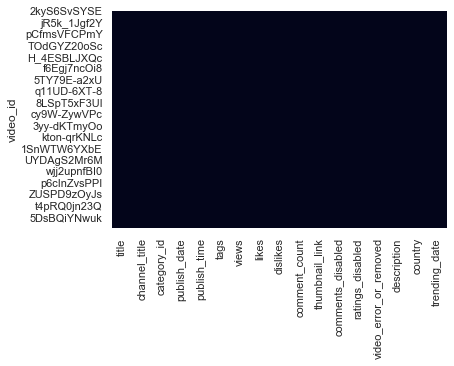

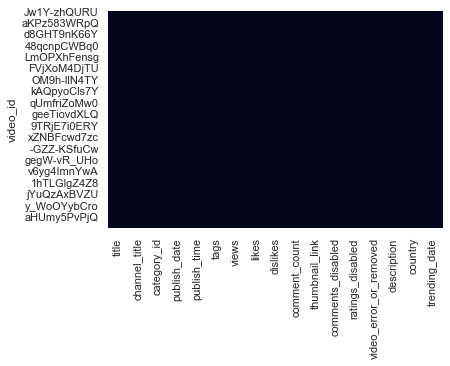

<Figure size 432x288 with 0 Axes>

In [11]:
# Checking for any null values via a heatmap.
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

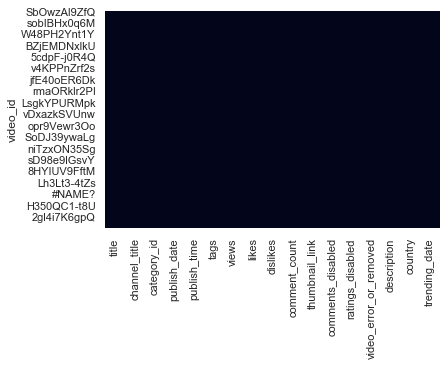

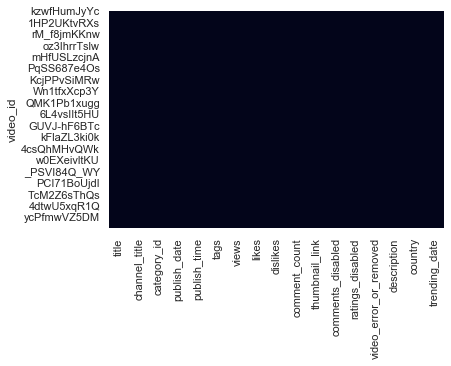

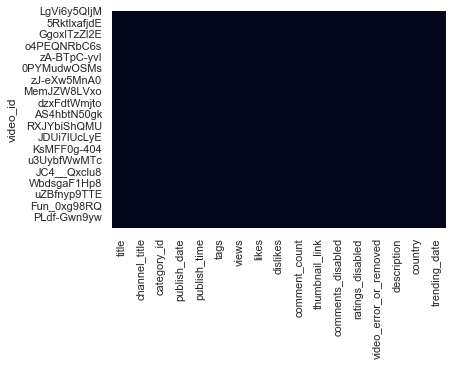

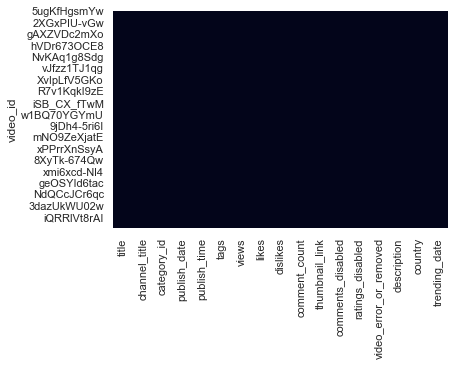

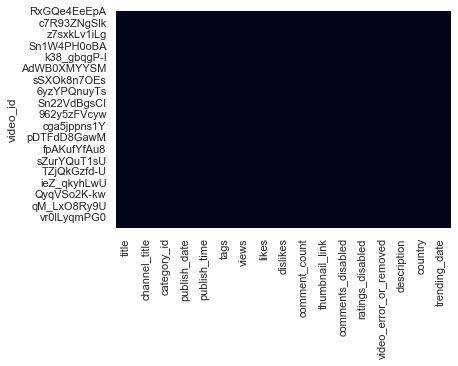

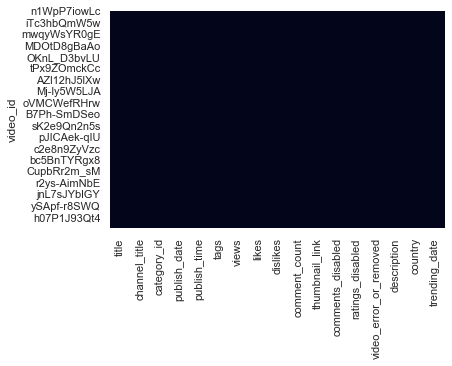

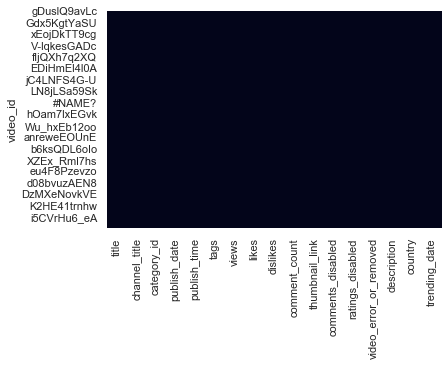

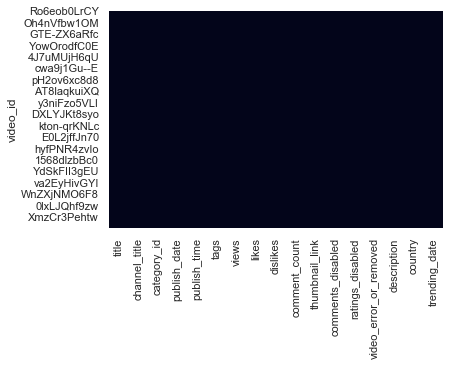

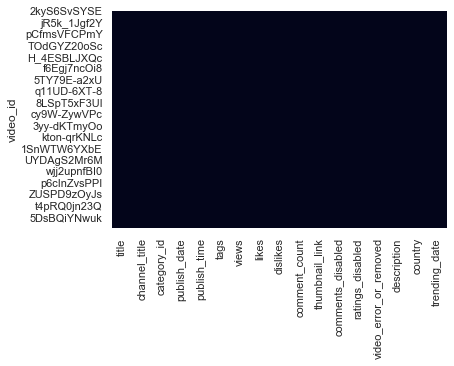

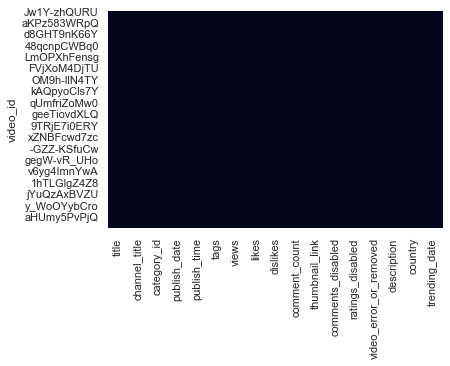

<Figure size 432x288 with 0 Axes>

In [12]:
# checking for any na values via heatmap.
for df in all_dataframes:
    sns.heatmap(df.isna(), cbar=False)
    plt.figure()

We do not have any missing or N/A values in our data. We checked this using heatmap. **Any missing value in a column would appears as an orange square against the black background of the heat-map**. We do not see any.

In [13]:
# combining the individual data frames into one data frame.
combined_df = pd.concat(all_dataframes)

Next, the data was further cleaned by **sorting the entries of the data set by trending_date**. This would result in the latest trending videos to be moved to the top of the data set. This was done so that we can view the current trends of the trending videos of each country, as they are more relevant to our project.

I created a duplicate copy of the data frame as a safety precaution and to keep a copy of the original data frame at hand. **Duplicate video entries were removed** while sorting the videos from the other data frame.

In [14]:
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

combined_df = combined_df.reset_index().sort_values('trending_date', ascending=False).drop_duplicates('video_id',keep='first').set_index('video_id')

for df in all_dataframes:
    df = df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

combined_df[['publish_date','publish_time','trending_date', 'country']].head()

,publish_date,publish_time,trending_date,country
video_id,,,,
4YFo4bdMO8Q,2018-05-11,04:06:35,2018-06-14,GB
L_cxNGfEd_0,2018-06-13,10:54:55,2018-06-14,FR
ENVlcPpTuh4,2018-06-13,14:56:22,2018-06-14,KR
5BeWvP521s8,2018-06-12,08:00:02,2018-06-14,KR
nOUlB0i2MaA,2018-06-13,19:10:31,2018-06-14,KR


In [15]:
# Reading the JSON file to see if it contains any useful information.
import json

with open('US_category_id.json', 'r') as f:
    data = f.read()

obj = json.loads(data)
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [16]:
# mapping the category number to category name and putting it into the data frame.
category_id = {}
with open('US_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']

combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))

for df in all_dataframes:
    df.insert(2, 'category', df['category_id'].map(category_id))

combined_df.head()

,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,,
4YFo4bdMO8Q,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,Music,10,2018-05-11,04:06:35,"Kyle|""SuperDuperKyle""|""Ikuyo""|""2 Chainz""|""Soph...",607552,18271,274,1423,https://i.ytimg.com/vi/4YFo4bdMO8Q/default.jpg,False,False,False,Debut album 'Light of Mine' out now: http://ky...,GB,2018-06-14
L_cxNGfEd_0,CLASSE PAS CLASSE - PAROLE DE CHAT,Parole de chat,Pets & Animals,15,2018-06-13,10:54:55,"classe|""pas classe""|""parole""|""parole de chat""|...",186468,28742,233,2168,https://i.ytimg.com/vi/L_cxNGfEd_0/default.jpg,False,False,False,"Classe pas classe, hommage aux Robins des bois...",FR,2018-06-14
ENVlcPpTuh4,"[ì í2018, íì¸í¡í¡] ìë¬´ë¦¬ ì§ë¬¸ì´...",MBCNEWS,News & Politics,25,2018-06-13,14:56:22,"MBC|""MBCë´ì¤""|""ë´ì¤ë°ì¤í¬""|""newsdesk""|""...",836427,2254,801,3551,https://i.ytimg.com/vi/ENVlcPpTuh4/default.jpg,False,False,False,"ì í2018, 6.13ì§ë°©ì ê±°, ê°íë°©ì¡, ì...",KR,2018-06-14
5BeWvP521s8,The genetic test result for the Dog Mother-Cat...,SBS TVëë¬¼ëì¥xì ëë©ë´,Pets & Animals,15,2018-06-12,08:00:02,"ì ëë©ë´|""ëë¬¼ëì¥""|""TVëë¬¼ëì¥""|""...",656898,5222,225,821,https://i.ytimg.com/vi/5BeWvP521s8/default.jpg,False,False,False,The unbelievable result baffled the entire nei...,KR,2018-06-14
nOUlB0i2MaA,2018 êµ­ë¯¼ì ì í - ì ê±°ë°©ì¡ 'ìì ê...,SBS ë´ì¤,News & Politics,25,2018-06-13,19:10:31,"ë´ì¤|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,False,'ì ê±°ë°©ì¡ì ëª ê°' SBSê° ì¨ë¤! SBSê°...,KR,2018-06-14


In [17]:
# Seeing how many unique categories there are.
combined_df['category'].unique()

array(['Music', 'Pets & Animals', 'News & Politics', 'Sports', 'Comedy',
       'Film & Animation', 'People & Blogs', 'Entertainment',
       'Howto & Style', 'Education', 'Gaming', 'Nonprofits & Activism',
       'Autos & Vehicles', 'Travel & Events', 'Shows',
       'Science & Technology', 'Movies', 'Trailers'], dtype=object)

### Exploratory Data Analysis.

#### What was the ratio of likes and dislikes in different categories?

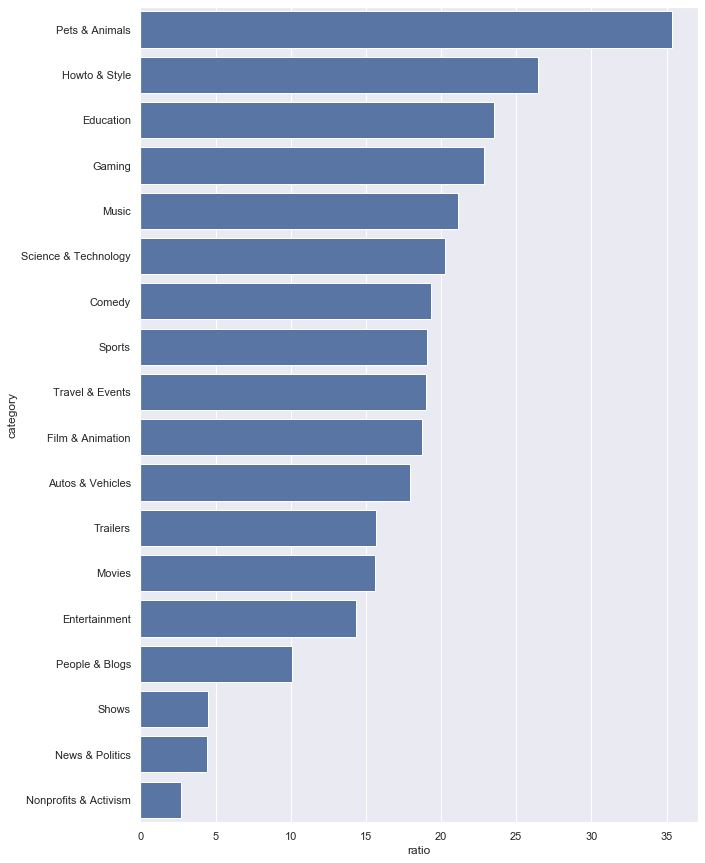

In [18]:
likesdf = combined_df.groupby('category')['likes'].agg('sum')
dislikesdf = combined_df.groupby('category')['dislikes'].agg('sum')
ratiodf = likesdf/dislikesdf 
ratiodf = ratiodf.sort_values(ascending=False).reset_index()

ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

We see that videos belonging to the pets and animals categories have the highest ratio of likes to dislikes videos among the trending categories whereas new and politics videos have the least. This implies that **people are less divided on the content of videos based on pets and animals** than compared to topics such as news, whose content can lead to a division of opinions among the user.

#### What was the category of the trending videos in each country?

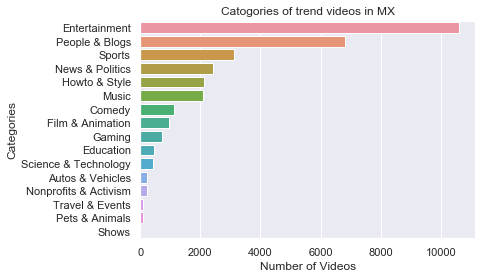

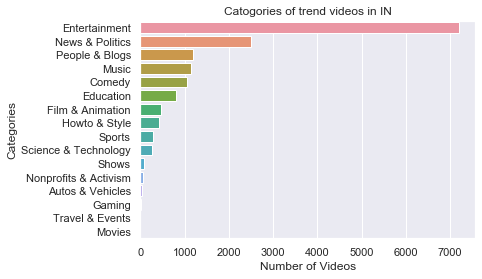

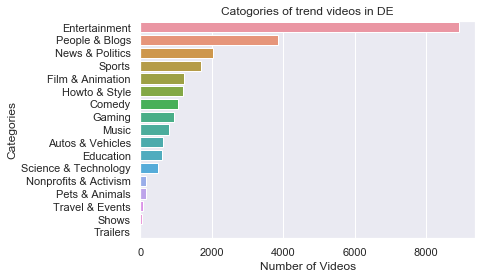

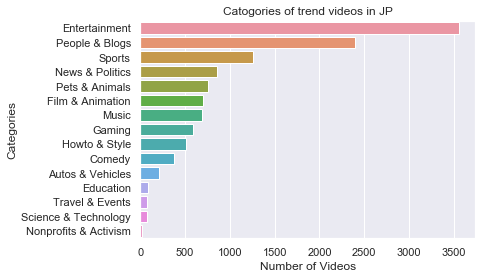

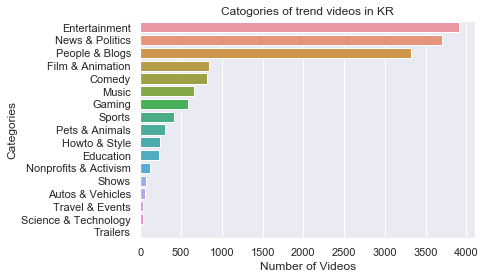

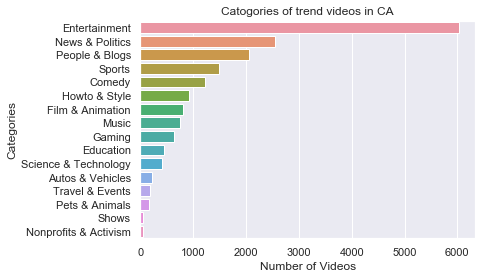

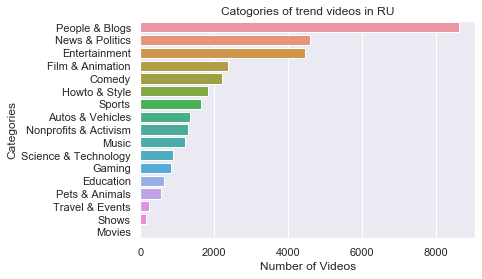

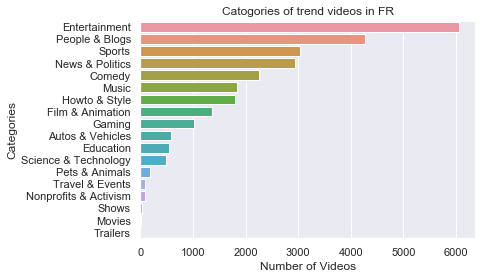

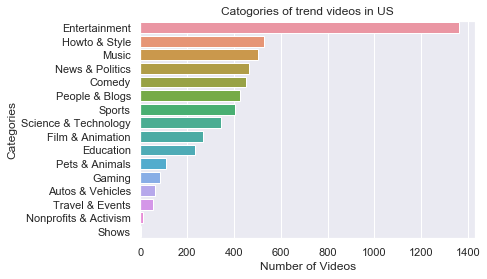

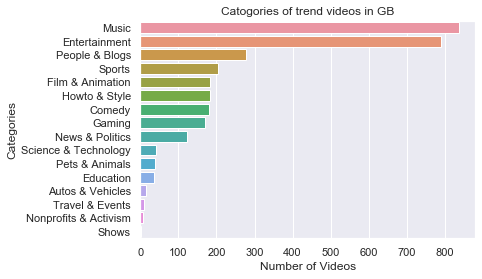

<Figure size 432x288 with 0 Axes>

In [20]:
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)
    
for country in countries:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()

Category most liked by the users in each of the other countries is ‘Entertainment’, apart from Russia and Great Britain.
**Viewers from Russia prefer the category ‘People and Blogs’ the most.
Viewers from Great Britain prefer the category ‘Music’ the most.**

#### What were the top 5 videos trending in each country?

In [21]:
temporary = []
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    temporary.append(temp)

# printing it for one random country.
temporary[6][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
7C2z4GqqS5E,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,Music,62796390,4470923
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,52611730,1891836
BhIEIO0vaBE,To Our Daughter,Kylie Jenner,People & Blogs,35832484,0
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,31648454,1405392
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,27973210,850378


**Music and Entertainment were the most popular categories for trending videos.**

#### Is the most liked video also the most trending video?

In [22]:
temporary = [] 
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are most liked
    temporary.append(temp)

# Printing a radom result.
temporary[1][['views', 'likes']]

,views,likes
video_id,,
FlsCjmMhFmw,125432237,2912710
6ZfuNTqbHE8,89930713,2606663
dfnCAmr569k,42019590,1804377
2Vv-BfVoq4g,39082222,1721384
tCXGJQYZ9JA,43738208,1658756


Most viewed video doesn't necessarily mean the most liked video. See rows 4 and 5.

#### What was the number of days between publishing a video and when it became trending?

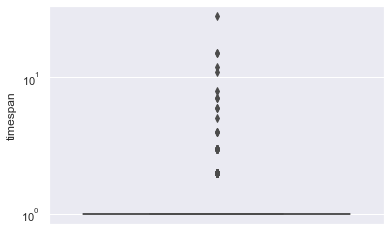

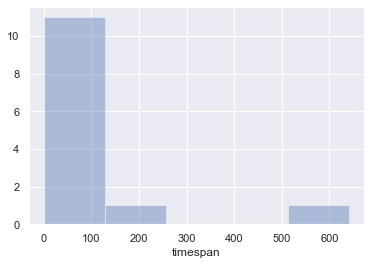

In [23]:
# Calculating days between publish and trending date
temporary = []
for data in all_dataframes:
    temp = data
    temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)

# Plotting
to_trending = temporary[0].sample(1000).groupby('video_id').timespan.max() # CA
sns_ax = sns.boxplot(y = to_trending)
_ = sns_ax.set(yscale = "log")
plt.show()
_ = sns.distplot(to_trending.value_counts(),bins='rice',kde=False)

**Most videos take less a 100 days to reach the trending page.**

#### What were the most liked categories?

In [24]:
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes
category,,
Entertainment,17588672171,471875260
Music,18175195668,444810351
Comedy,4573398180,218752102
People & Blogs,5606736781,157767436
Howto & Style,2215633882,77250724


#### Which categories got the most comments?

In [25]:
temp = combined_df
temp = temp.groupby('category')['views','likes', 'comment_count'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='comment_count', ascending=False).head()
temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,comment_count
category,,,
Entertainment,17588672171,471875260,68370777
Music,18175195668,444810351,36232007
People & Blogs,5606736781,157767436,24662982
Comedy,4573398180,218752102,23294917
News & Politics,3470697996,53467988,14956906


#### What were the most frequently words occurring in tags and descriptions?

In [26]:
#! pip3 install wordcloud

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(15, 15))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=1000,
                      max_font_size=120, random_state=42).generate(str(combined_df['tags']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Tags', fontsize=20)
plt.axis('off')
plt.show()

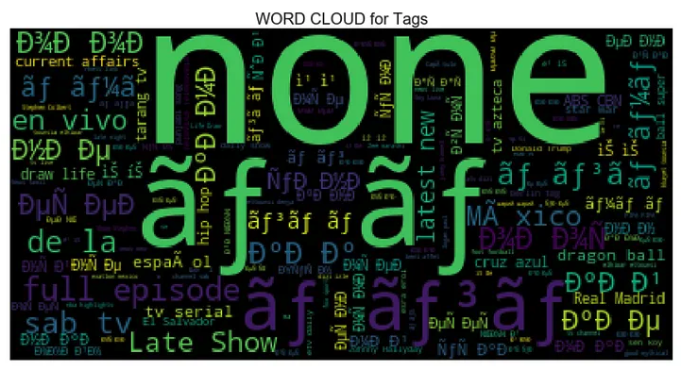

In [ ]:
plt.figure(figsize = (15, 15))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
 background_color = 'black',
 stopwords = stopwords,
 max_words = 1000,
 max_font_size = 120,
 random_state = 42
 ).generate(str(combined_df['description']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Description', fontsize = 20)
plt.axis('off')
plt.show()

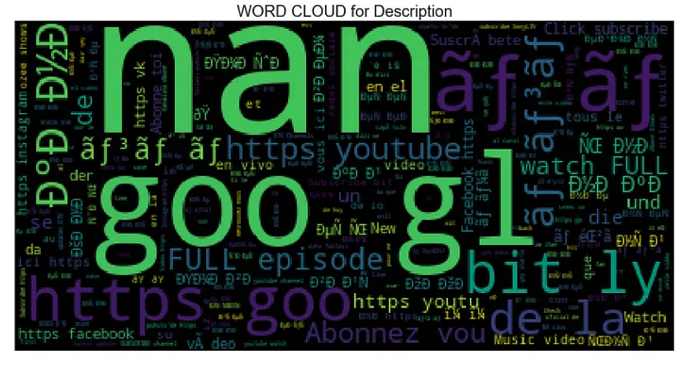

#### Were there any correlations between views, likes, dislikes and comments?

In [27]:
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = combined_df[col].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.768352,0.378172,0.423572
likes,0.768352,1.000000,0.435397,0.700513
dislikes,0.378172,0.435397,1.000000,0.667473
comment_count,0.423572,0.700513,0.667473,1.000000


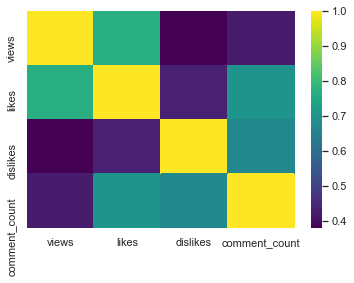

In [28]:
sns.heatmap(corr, cmap = 'viridis')

**There is a positive relation between views and likes, likes and comment_count, dislikes and comment_count.**

**End of the project.**